# **Install dan Import Library**

*   NLTK

NLTK (Natural Language Toolkit) menyediakan berbagai macam fungsi dan alat yang dapat digunakan dalam pemrosesan bahasa alami.

*   Sastrawi

Sastrawi adalah library Python yang digunakan untuk melakukan stemming bahasa Indonesia. Stemming adalah proses menghilangkan imbuhan pada kata sehingga kata tersebut kembali ke kata dasar (root word). Misalnya, kata "memakan" akan diubah menjadi "makan" setelah melalui proses stemming.

*   Pandas

Pandas adalah library Python yang banyak digunakan untuk mengelola dan menganalisis data.






In [1]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.9 MB/s 


In [2]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import string 
import re
import matplotlib.pyplot as plt
import csv

In [3]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Import Data**

In [4]:
url_data = (r'https://raw.githubusercontent.com/neilzs/data/main/Data_Twitter_Pildun.csv')

In [5]:
df = pd.read_csv(url_data)
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608137397375766529,1608137397375766529,2022-12-28 16:26:47 UTC,2022-12-28,16:26:47,0,1222927522033094656,idextratime,Extra Time Indonesia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608118257361518596,1608118257361518596,2022-12-28 15:10:44 UTC,2022-12-28,15:10:44,0,734582844685705218,58o94,★,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1608114838815010817,1608114838815010817,2022-12-28 14:57:09 UTC,2022-12-28,14:57:09,0,945591801330597892,harus_kamutahu,Harus kamu tahu,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608112598410743814,1608112598410743814,2022-12-28 14:48:15 UTC,2022-12-28,14:48:15,0,740603423079288832,gusyusufchannel,Gus Yusuf Channel,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608111124670709762,1608111124670709762,2022-12-28 14:42:24 UTC,2022-12-28,14:42:24,0,36205934,abuv_average88,Victoria Trice,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,1604539206076108802,1604539206076108802,2022-12-18 18:08:52 UTC,2022-12-18,18:08:52,0,142537012,adjie_djithuu,Aji Widayanto,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2655,1604539185859215361,1604539185859215361,2022-12-18 18:08:47 UTC,2022-12-18,18:08:47,0,926487776081539072,skandalmedia,#LawanPropaganda🏴⭐️SkandalMedia⭐️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2656,1604539121526939649,1604539121526939649,2022-12-18 18:08:32 UTC,2022-12-18,18:08:32,0,288147069,haijoon_,karan⁷🌻 indigo 💙,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2657,1604539090158096384,1604539090158096384,2022-12-18 18:08:24 UTC,2022-12-18,18:08:24,0,1433831856986738690,andreasyona1601,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# **Text Prepocesing**
Text preprocessing adalah suatu proses untuk menyeleksi data text agar menjadi lebih terstruktur lagi dengan melalui serangkaian tahapan yang meliputi tahapan text, cleaning, case folding, tokenizing, stopword dan stemming.

## **Text Cleaning**
Proses membersihkan
dokumen dari komponen-komponen
yang tidak memiliki hubungan dengan
informasi yang ada pada dokumen,
seperti tag html, link, emoji, angka, dll.

In [6]:
def remove_char_special(text):
    # menghapus tab, baris baru
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus emoticon 
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, dan hastag
    text = ' '.join(re.sub("([@#][A-Za-z]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus url
    return text.replace("http://", " ").replace("https://", " ")    

def remove_punctuation(text):
    return text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

def remove_number(text):
    return re.sub(r"[0-9]", "", text)   

def remove_whitespace(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)


In [7]:
df['data_bersih'] = df['tweet']

In [8]:
df['data_bersih'] = df['data_bersih'].apply(remove_char_special)  
df['data_bersih'] = df['data_bersih'].apply(remove_punctuation) 
df['data_bersih'] = df['data_bersih'].apply(remove_number)
df['data_bersih'] = df['data_bersih'].apply(remove_whitespace)
df['data_bersih'] = df['data_bersih'].apply(remove_whitespace_multiple)

 **Sebelum dan Sesudah Text Cleaning**

In [9]:
df[['tweet','data_bersih']]

,tweet,data_bersih
0,Qatar University mengumumkan kamar yang ditemp...,Qatar University mengumumkan kamar yang ditemp...
1,Puan Maharani berharap gelaran Piala Dunia 202...,Puan Maharani berharap gelaran Piala Dunia yan...
2,#youtube 8 stadion mewah dan canggih Piala Dun...,stadion mewah dan canggih Piala Dunia Qatar Ib...
3,"KH. Chudlori, Gus Dur dan Piala Dunia Qatar 20...",KH Chudlori Gus Dur dan Piala Dunia Qatar Gus ...
4,Puan Maharani berharap gelaran Piala Dunia 202...,Puan Maharani berharap gelaran Piala Dunia yan...
...,...,...
2654,Final sangat istimewa Piala Dunia Qatar 2022. ...,Final sangat istimewa Piala Dunia Qatar Selama...
2655,😎 akhirnya tumbang juga pendukung pelangi bute...,akhirnya tumbang juga pendukung pelangi butex ...
2656,Digadang jadi piala dunia paling sunyi karna b...,Digadang jadi piala dunia paling sunyi karna b...
2657,Selamat kepada Argentina atas kemenangannya di...,Selamat kepada Argentina atas kemenangannya di...


## **Case Folding**
Case folding merupakan proses dalam text preprocessing yang dilakukan untuk menyeragamkan karakter pada data. Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z

In [10]:
df['data_lower'] = df['data_bersih'].str.lower()

**Sebelum dan Sesudah Case Folding**

In [11]:
df[["data_bersih", "data_lower"]]

,data_bersih,data_lower
0,Qatar University mengumumkan kamar yang ditemp...,qatar university mengumumkan kamar yang ditemp...
1,Puan Maharani berharap gelaran Piala Dunia yan...,puan maharani berharap gelaran piala dunia yan...
2,stadion mewah dan canggih Piala Dunia Qatar Ib...,stadion mewah dan canggih piala dunia qatar ib...
3,KH Chudlori Gus Dur dan Piala Dunia Qatar Gus ...,kh chudlori gus dur dan piala dunia qatar gus ...
4,Puan Maharani berharap gelaran Piala Dunia yan...,puan maharani berharap gelaran piala dunia yan...
...,...,...
2654,Final sangat istimewa Piala Dunia Qatar Selama...,final sangat istimewa piala dunia qatar selama...
2655,akhirnya tumbang juga pendukung pelangi butex ...,akhirnya tumbang juga pendukung pelangi butex ...
2656,Digadang jadi piala dunia paling sunyi karna b...,digadang jadi piala dunia paling sunyi karna b...
2657,Selamat kepada Argentina atas kemenangannya di...,selamat kepada argentina atas kemenangannya di...


## **Replace Slang Word**
Slang words adalah kosakata tidak baku baik berupa ucapan atau tulisan.

In [12]:
!wget https://raw.githubusercontent.com/neilzs/data/main/slang.txt -O slang.txt

--2022-12-29 17:09:41--  https://raw.githubusercontent.com/neilzs/data/main/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180053 (176K) [text/plain]
Saving to: ‘slang.txt’

slang.txt           100%[===================>] 175.83K  --.-KB/s    in 0.02s   

2022-12-29 17:09:42 (10.8 MB/s) - ‘slang.txt’ saved [180053/180053]



In [13]:
fSlang = 'slang.txt'
bahasa = 'id'
sw=open(fSlang,encoding='utf-8', errors='ignore', mode='r');SlangS=sw.readlines();sw.close()
SlangS = {slang.strip().split(':')[0]:slang.strip().split(':')[1] for slang in SlangS}

**Beberapa List Slang Words**

In [14]:
SlangS

{'woww': 'wow',
 'aminn': 'amin',
 'met': 'selamat',
 'netaas': 'menetas',
 'keberpa': 'keberapa',
 'eeeehhhh': 'eh',
 'kata2nyaaa': 'kata-katanya',
 'hallo': 'halo',
 'kaka': 'kakak',
 'ka': 'kak',
 'daah': 'dah',
 'aaaaahhhh': 'ah',
 'yaa': 'ya',
 'smga': 'semoga',
 'slalu': 'selalu',
 'amiin': 'amin',
 'kk': 'kakak',
 'trus': 'terus',
 'sii': 'sih',
 'nyenengin': 'menyenangkan',
 'bgt': 'banget',
 'gemess': 'gemas',
 'akuuu': 'aku',
 'jgn': 'jangan',
 'udah': 'sudah',
 'gitu': 'begitu',
 'aja': 'saja',
 'gemesiin': 'menggemaskan',
 'menyenangkn': 'menyenangkan',
 'rb': 'ribu',
 'akau': 'aku',
 'saranin': 'menyarankan',
 'nemuin': 'menemukan',
 'yah': 'ya',
 'mnis2nya': 'manis-manisnya',
 'gtu': 'begitu',
 'tu': 'itu',
 'idolaa': 'idola',
 'bangett': 'banget',
 'kaakk': 'kak',
 'baaiikkk': 'baik',
 'telaatt': 'telat',
 'kaak': 'kak',
 'yg': 'yang',
 'lg': 'lagi',
 'skarang': 'sekarang',
 'sempet': 'sempat',
 'karna': 'karena',
 'ngga': 'enggak',
 'mantep': 'mantap',
 'loohhh': 'loh',

### **Fungsi untuk mengubah slang words**

In [15]:
def slang(t):
  t = word_tokenize(t)
  for i, x in enumerate(t):
    if x in SlangS.keys():
      t[i] = SlangS[x]
  return ''.join(' '.join(x for x in t if x not in ""))

In [16]:
data = [x for x in df['data_lower']]

In [17]:
replace_slangs = list(map(slang, data)) 

In [18]:
df['data_setelah_slang'] = replace_slangs

## **Tokenize**
Memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat,

In [19]:
df['data_token'] = df['data_setelah_slang'].apply(nltk.word_tokenize)

In [20]:
df[['data_setelah_slang','data_token']]

,data_setelah_slang,data_token
0,qatar university mengumumkan kamar yang ditemp...,"[qatar, university, mengumumkan, kamar, yang, ..."
1,puan maharani berharap gelaran piala dunia yan...,"[puan, maharani, berharap, gelaran, piala, dun..."
2,stadion mewah dan canggih piala dunia qatar ib...,"[stadion, mewah, dan, canggih, piala, dunia, q..."
3,kah chudlori gus dur dan piala dunia qatar gus...,"[kah, chudlori, gus, dur, dan, piala, dunia, q..."
4,puan maharani berharap gelaran piala dunia yan...,"[puan, maharani, berharap, gelaran, piala, dun..."
...,...,...
2654,final sangat istimewa piala dunia qatar selama...,"[final, sangat, istimewa, piala, dunia, qatar,..."
2655,akhirnya tumbang juga pendukung pelangi butex ...,"[akhirnya, tumbang, juga, pendukung, pelangi, ..."
2656,digadang jadi piala dunia paling sunyi karena ...,"[digadang, jadi, piala, dunia, paling, sunyi, ..."
2657,selamat kepada argentina atas kemenangannya di...,"[selamat, kepada, argentina, atas, kemenangann..."


### **Melihat Frekuensi Kata**

In [21]:
list_to_text = ' '.join([i for i in df['data_setelah_slang']])

In [22]:
tokenized_words = nltk.tokenize.word_tokenize(list_to_text)

In [23]:
frekuensi_tokens = nltk.FreqDist(tokenized_words)
print('Frekuensi Tokens : \n') 
print (frekuensi_tokens.most_common())

Frekuensi Tokens : 

[('dunia', 2797), ('piala', 2728), ('qatar', 2204), ('di', 1414), ('argentina', 1158), ('yang', 868), ('juara', 677), ('messi', 660), ('dan', 573), ('final', 420), ('dari', 353), ('ini', 341), ('prancis', 325), ('lionel', 310), ('stadion', 281), ('menjadi', 257), ('dengan', 257), ('terbaik', 228), ('jadi', 219), ('untuk', 213), ('timnas', 194), ('pemain', 191), ('pada', 179), ('fifa', 177), ('usai', 172), ('sebagai', 170), ('setelah', 169), ('mbappe', 167), ('sudah', 165), ('tahun', 164), ('selamat', 161), ('dalam', 152), ('cup', 145), ('bola', 142), ('gol', 141), ('world', 136), ('trofi', 132), ('berhasil', 128), ('ada', 126), ('adu', 126), ('ke', 123), ('itu', 122), ('tim', 119), ('pertandingan', 116), ('dibuat', 110), ('menonton', 108), ('bahan', 108), ('bekas', 108), ('mewah', 103), ('canggih', 103), ('penalti', 102), ('telah', 99), ('indonesia', 98), ('kemenangan', 97), ('negara', 95), ('bisa', 94), ('sepak', 92), ('desember', 86), ('tapi', 86), ('juga', 86), 

## **Stopwords**
Kata yang diabaikan dalam pemrosesan dan biasanya disimpan di dalam stop lists. Stop list ini berisi daftar kata umum yang mempunyai fungsi tapi tidak mempunyai arti.

In [24]:
from nltk.corpus import stopwords

In [25]:
!wget https://raw.githubusercontent.com/neilzs/data/main/stopword.txt -O stopword.txt

--2022-12-29 17:11:21--  https://raw.githubusercontent.com/neilzs/data/main/stopword.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7203 (7.0K) [text/plain]
Saving to: ‘stopword.txt’

stopword.txt        100%[===================>]   7.03K  --.-KB/s    in 0s      

2022-12-29 17:11:22 (19.5 MB/s) - ‘stopword.txt’ saved [7203/7203]



In [26]:
list_stopwords = stopwords.words('indonesian')

txt_stopword = pd.read_csv("stopword.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))


list_stopwords.extend(["tq","yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','hr','rb'])


# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [27]:
df['data_stopwords'] = df['data_token'].apply(stopwords_removal) 

df[['data_token','data_stopwords']]

,data_token,data_stopwords
0,"[qatar, university, mengumumkan, kamar, yang, ...","[qatar, university, mengumumkan, kamar, ditemp..."
1,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
2,"[stadion, mewah, dan, canggih, piala, dunia, q...","[stadion, mewah, canggih, piala, dunia, qatar,..."
3,"[kah, chudlori, gus, dur, dan, piala, dunia, q...","[kah, chudlori, gus, dur, piala, dunia, qatar,..."
4,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
...,...,...
2654,"[final, sangat, istimewa, piala, dunia, qatar,...","[final, istimewa, piala, dunia, qatar, selamat..."
2655,"[akhirnya, tumbang, juga, pendukung, pelangi, ...","[tumbang, pendukung, pelangi, butex, en, islam..."
2656,"[digadang, jadi, piala, dunia, paling, sunyi, ...","[digadang, piala, dunia, sunyi, kontroversi, p..."
2657,"[selamat, kepada, argentina, atas, kemenangann...","[selamat, argentina, kemenangannya, piala, dun..."


**Menghapus list yang kosong dari kolom data_stopwords**

In [28]:
df = df[df.astype(str)['data_stopwords'] != '[]']

In [29]:
df[['data_token','data_stopwords']]

,data_token,data_stopwords
0,"[qatar, university, mengumumkan, kamar, yang, ...","[qatar, university, mengumumkan, kamar, ditemp..."
1,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
2,"[stadion, mewah, dan, canggih, piala, dunia, q...","[stadion, mewah, canggih, piala, dunia, qatar,..."
3,"[kah, chudlori, gus, dur, dan, piala, dunia, q...","[kah, chudlori, gus, dur, piala, dunia, qatar,..."
4,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
...,...,...
2654,"[final, sangat, istimewa, piala, dunia, qatar,...","[final, istimewa, piala, dunia, qatar, selamat..."
2655,"[akhirnya, tumbang, juga, pendukung, pelangi, ...","[tumbang, pendukung, pelangi, butex, en, islam..."
2656,"[digadang, jadi, piala, dunia, paling, sunyi, ...","[digadang, piala, dunia, sunyi, kontroversi, p..."
2657,"[selamat, kepada, argentina, atas, kemenangann...","[selamat, argentina, kemenangannya, piala, dun..."


## **Stemming**
Stemming adalah menghilangkan imbuhan pada suatu kata

In [30]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

### **Fungsi untuk stemming dengan menggunakan sastrawi**

In [ ]:
def stemmed(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['data_stopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

4800
------------------------
qatar : qatar
university : university
mengumumkan : umum
kamar : kamar
ditempati : tempat
lionel : lionel
messi : messi
gelaran : gelar
piala : piala
dunia : dunia
diubah : ubah
museum : museum
mini : mini
kampus : kampus
kamp : kamp
timnas : timnas
argentina : argentina
kemarin : kemarin
puan : puan
maharani : maharani
berharap : harap
berjalan : jalan
lancar : lancar
harapan : harap
rakyat : rakyat
stadion : stadion
mewah : mewah
canggih : canggih
sri : sri
mulyani : mulyani
mama : mama
awards : awards
kah : kah
chudlori : chudlori
gus : gus
dur : dur
ch : ch
youtube : youtube
kylian : kylian
mbappe : mbappe
bangkit : bangkit
gagal : gagal
doooooooong : doooooooong
min : min
saksi : saksi
bisu : bisu
disulap : sulap
pengelola : kelola
mess : mess
basecamp : basecamp
menjadikan : jadi
leo : leo
gambaran : gambar
sejarah : sejarah
kabarnya : kabar
barat : barat
fenomena : fenomena
orang : orang
beli : beli
bidet : bidet
semprotan : semprot
pulang : pulang


### Fungsi untuk mengaplikasikan hasil stemming ke dataframe

In [ ]:
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

In [ ]:
df['data_stemming'] = df['data_stopwords'].apply(get_stemmed_term)

<ipython-input-33-f00741877771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_stemming'] = df['data_stopwords'].apply(get_stemmed_term)


In [ ]:
df['data_text_bersih'] = df['data_stemming'].apply(lambda x: ' '.join(x))

<ipython-input-34-3357bc436a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_text_bersih'] = df['data_stemming'].apply(lambda x: ' '.join(x))


In [ ]:
df[['data_stopwords','data_stemming','data_text_bersih']]

,data_stopwords,data_stemming,data_text_bersih
0,"[qatar, university, mengumumkan, kamar, ditemp...","[qatar, university, umum, kamar, tempat, lione...",qatar university umum kamar tempat lionel mess...
1,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, harap, gelar, piala, dunia, q...",puan maharani harap gelar piala dunia qatar ja...
2,"[stadion, mewah, canggih, piala, dunia, qatar,...","[stadion, mewah, canggih, piala, dunia, qatar,...",stadion mewah canggih piala dunia qatar sri mu...
3,"[kah, chudlori, gus, dur, piala, dunia, qatar,...","[kah, chudlori, gus, dur, piala, dunia, qatar,...",kah chudlori gus dur piala dunia qatar gus ch ...
4,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, harap, gelar, piala, dunia, q...",puan maharani harap gelar piala dunia qatar ja...
...,...,...,...
2654,"[final, istimewa, piala, dunia, qatar, selamat...","[final, istimewa, piala, dunia, qatar, selamat...",final istimewa piala dunia qatar selamat argen...
2655,"[tumbang, pendukung, pelangi, butex, en, islam...","[tumbang, dukung, pelangi, butex, en, islamoph...",tumbang dukung pelangi butex en islamophobia n...
2656,"[digadang, piala, dunia, sunyi, kontroversi, p...","[gadang, piala, dunia, sunyi, kontroversi, pia...",gadang piala dunia sunyi kontroversi piala dun...
2657,"[selamat, argentina, kemenangannya, piala, dun...","[selamat, argentina, menang, piala, dunia, qatar]",selamat argentina menang piala dunia qatar


In [ ]:
filename = 'Data_Twitter_Bersih.csv'
df.to_csv(filename, index=False)

# **Visualisasi Frekuensi Kata**

pada tahap ini, dilakukan visualisasi frekunesi keseluruhan kata menggunakan wordcloud. Kemudian dilakukan pemisahan visualisasi frekuensi kata menjadi positif dan negatif, untuk mengetahui jumlah kata dari masing-masing sentimen menggunakan wordcloud dan bar chart.

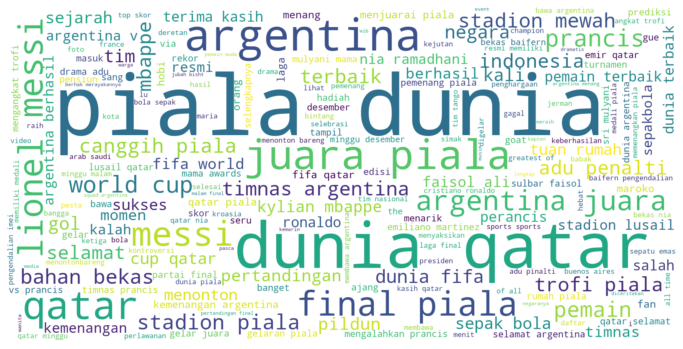

In [ ]:
# menampilkan keseluruhan frekuensi kata hasil dari text processing dengan wordcloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, stopwords=list_stopwords, background_color="white").generate(list_to_text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Labelling**

In [ ]:
!wget https://raw.githubusercontent.com/neilzs/data/main/Data_Twitter_Bersih.csv -O Data_Twitter_Bersih.csv
!wget https://raw.githubusercontent.com/neilzs/data/main/lexicon_negative.csv -O lexicon_negative.csv
!wget https://raw.githubusercontent.com/neilzs/data/main/lexicon_positive.csv -O lexicon_positive.csv

--2022-12-29 17:02:38--  https://raw.githubusercontent.com/neilzs/data/main/Data_Twitter_Bersih.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3718074 (3.5M) [text/plain]
Saving to: ‘Data_Twitter_Bersih.csv’

Data_Twitter_Bersih 100%[===================>]   3.54M  --.-KB/s    in 0.05s   

2022-12-29 17:02:38 (70.9 MB/s) - ‘Data_Twitter_Bersih.csv’ saved [3718074/3718074]

--2022-12-29 17:02:38--  https://raw.githubusercontent.com/neilzs/data/main/lexicon_negative.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82704 (81K)

In [ ]:
tweets = []

with open('Data_Twitter_Bersih.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    tweet= dict()
    tweet['tweet_bersih'] = row[42]
    tweets.append(tweet)

In [ ]:
lexicon_positive = dict()
lexicon_negative = dict()

In [ ]:
# Membaca file CSV 'lexicon.csv' dan menyimpan isinya ke dalam dictionary 'lexicon_positive
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

In [ ]:
for tweet in tweets:
    score = 0
    for word in tweet['tweet_bersih'].split(): 
        if word in lexicon_positive:
            score = score + lexicon_positive[word]

    for word in tweet['tweet_bersih'].split():
        if word in lexicon_negative:
            score = score + lexicon_negative[word]

    tweet['score'] = score
    if (score > 0):
        tweet['sentiment'] = 'positive'
    elif (score < 0):
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

In [ ]:
tweets

[{'tweet_bersih': 'data_text_bersih', 'score': 0, 'sentiment': 'neutral'},
 {'tweet_bersih': 'qatar university umum kamar tempat lionel messi gelar piala dunia ubah museum mini kampus kamp timnas argentina piala dunia kemarin',
  'score': -2,
  'sentiment': 'negative'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan lancar puan harap rakyat',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'stadion mewah canggih piala dunia qatar sri mulyani mama awards',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'kah chudlori gus dur piala dunia qatar gus ch youtube',
  'score': -1,
  'sentiment': 'negative'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan lancar puan harap rakyat',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan lancar puan harap rakyat',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan l

In [ ]:
datas = pd.DataFrame.from_dict(tweets)

In [ ]:
print(datas['sentiment'].value_counts())

negative    1414
positive     987
neutral      255
Name: sentiment, dtype: int64


# **Modelling**

## **Pembobotan kata dengan TF - IDF**
Sebelum ke tahap buat model, kita harus pake metode TF-idF ini untuk mengubah teks jadi vektor numerik supaya bisa digunakan sebagai input dalam model.

In [ ]:
# menampilkan data
datas.head()

,tweet_bersih,score,sentiment
0,data_text_bersih,0,neutral
1,qatar university umum kamar tempat lionel mess...,-2,negative
2,puan maharani harap gelar piala dunia qatar ja...,3,positive
3,stadion mewah canggih piala dunia qatar sri mu...,3,positive
4,kah chudlori gus dur piala dunia qatar gus ch ...,-1,negative


In [ ]:
# menambahkan library untuk menghitung tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# memanggil library TfidfVectorizer
vectorizer = TfidfVectorizer()

# konversi teks menjadi vektor menggunakn fit_transform
X = vectorizer.fit_transform(datas['tweet_bersih'].values.astype('U'))

# membuat label untuk modelling
y = datas['sentiment']

##Membuat model dan evaluasi menggunakan Multinominal Naive Bayes 
tahap ini merupakan tahap membuat model dan evaluasi. Model yang digunakan disini adalah Multinomial Naive Bayes yang biasa digunakan dalam klasifikasi teks. 

pada tahap ini yang dilakukan adalah:
* membagi data train dan dan test menjadi 80% dan 20%.
* membuat model Multinomial Naive Bayes.
* Menampilkan confusion matrix, nilai akurasi, recall, dan f1-score.

In [ ]:
# membagi data training dan data testing (20% data testing dan 80% data training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# menambahkan model library Multinomial Naive Bayes, confusion matrix, dan nilai akurasi
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

# Memanggil fungsi klasifikasi Naive bayes dan Memasukkan data training pada model
clf = LinearSVC().fit(X_train, y_train)
predicted = clf.predict(X_test)

# mengukur keberhasilan program menggunakan confusion matrix dan nilai akurasi
cm = (confusion_matrix(y_test, predicted))
ac = (accuracy_score(y_test, predicted))

In [ ]:
# menampilkan confusion matrix
cm

array([[263,   1,  18],
       [ 27,  19,  15],
       [ 26,   3, 160]])

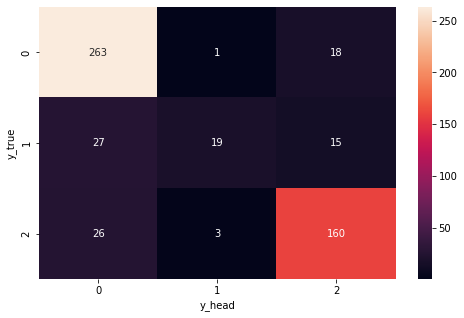

In [ ]:
# menampilkan visualisasi confusion matrix menggunakan library matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
# menampilkan nilai akurasi
print('nilai akurasi modelnya adalah :', ac)

nilai akurasi modelnya adalah : 0.8308270676691729


In [ ]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.83      0.93      0.88       282
     neutral       0.83      0.31      0.45        61
    positive       0.83      0.85      0.84       189

    accuracy                           0.83       532
   macro avg       0.83      0.70      0.72       532
weighted avg       0.83      0.83      0.82       532



# **Visualisasi**


In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [ ]:
# Memisahkan dataframe menjadi dua, yaitu data dengan label positif dan negatif
df_positif = datas[datas['sentiment'] == 'positive']
df_negatif = datas[datas['sentiment'] == 'negative']
df_neutral = datas[datas['sentiment'] == 'neutral']

In [ ]:
# Menggabungkan semua tweet dengan label positif menjadi satu string
all_positif = ' '.join(df_positif['tweet_bersih'])

# Menggabungkan semua tweet dengan label negatif menjadi satu string
all_negatif = ' '.join(df_negatif['tweet_bersih'])

# Menggabungkan semua tweet dengan label neutral menjadi satu string
all_neutral = ' '.join(df_neutral['tweet_bersih'])

POSITIF



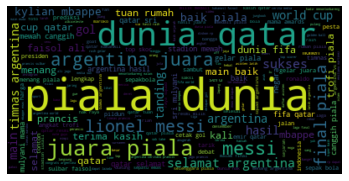


Negatif


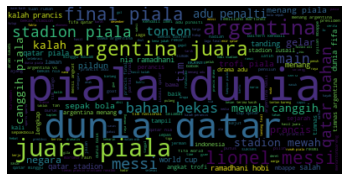


Neutral


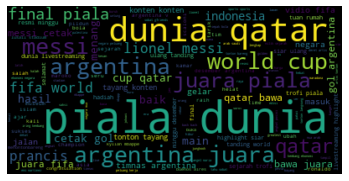

In [ ]:
# Membuat wordcloud dari string positif
print('POSITIF\n')
wordcloud = WordCloud().generate(all_positif)

# Menampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Membuat wordcloud dari string negatif
print('\nNegatif')
wordcloud = WordCloud().generate(all_negatif)

# Menampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Membuat wordcloud dari string negatif
wordcloud = WordCloud().generate(all_neutral)

# Menampilkan wordcloud
print('\nNeutral')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()